### Some prerequisite

In [107]:
# set random seed
import random
random.seed(10)


### Setting Hyperparameters

In [108]:
# hyperparameters:
LB = -15
UB = 15
UNIT = 1
NO_UPDATE_TIMES = 10e4

# Define iteration numbers
n = 2

# Set temperature reduction factor
c = 0.5

### Define Objective Function

In [109]:
import numpy as np

# Define the objective function
def f(x_1, x_2):
    return 6*(x_1**2)-6*x_1*x_2+2*(x_2**2)-x_1-2*x_2

print('objective function declaration succeed')

objective function declaration succeed


---
## 3D visualization

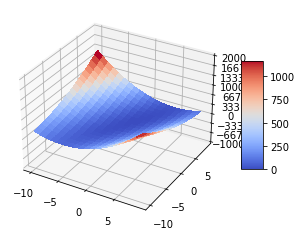

In [110]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

# set range
x_1 = np.arange(-10, 10, UNIT)
x_2 = np.arange(-10, 10, UNIT)
X, Y = np.meshgrid(x_1, x_2) # meshgrid: 接受兩個1D向量，生成一個座標矩陣
Z = f(X, Y)

# Plt the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)

# Customize the z axis.
ax.set_zlim(-1000,2000)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically

# Label for axes
plt.xlabel = '$x_1$'
plt.ylabel = '$x_2$'

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


---
### Define method "get_random": In order to sample form uniform distribution

In [111]:
def get_random(low, high, unit):
    return np.random.uniform(low, high, unit)

---
### Generating Initial Temperature, Initial points (where we start doing SA)

In [112]:
# Initialization

# Define Initial Temperature
## randomly generate four points,
## and set initial temperature as their mean of objective function values.

import numpy as np
rand_4pts = []
for j in range(4):
    x_1 = get_random(-10, 10.1 ,1)
    x_2 = get_random(-10, 10.1 ,1)
    rand_4pts.append(f(x_1, x_2))
#print(rand_4pts)

init_temp = np.mean(rand_4pts)
objf_value = []
objf_value.append(init_temp)
print(f'The mean objective value of four sample pts is: {init_temp}')

# select an initial design point
x_1 = get_random(-10, 10.1 ,1)
x_2 = get_random(-10, 10.1 ,1)

X = []

X.append([x_1, x_2])
print(f'randomly select an initial design point: {x_1, x_2}')

objf_value.append(f(x_1, x_2))
print(f'objective function value of $X_1$ is: {objf_value}')


The mean objective value of four sample pts is: 99.5556401538202
randomly select an initial design point: (array([-6.27448201]), array([-1.55461542]))
objective function value of $X_1$ is: [99.5556401538202, array([191.90567898])]


---
### Main body of SA process, start iterating

In [113]:
# Step 2

## Some Initializations
no_update_times = 0
des_x_1 = x_1
des_x_2 = x_2
temp = init_temp
print(f'init_temp = {init_temp}')
iters_sum = 0
# while((no_update_times<=5)&(iters_sum<1000000)):
while(no_update_times<=NO_UPDATE_TIMES):

    iter = 0

    while((iter<=n)&(no_update_times<=NO_UPDATE_TIMES)):
        # print(f'###### iter = {iter} ######')
        # print(f'design (x_1, x_2) = {(des_x_1, des_x_2)}')

        # Compute current_state
        current_state = f(des_x_1, des_x_2)

        # randomly select two uniformly distributed r.v.
        u_1 = get_random(0, 1, 1)
        u_2 = get_random(0, 1, 1)

        # set ranges as +- 6
        r_1 = des_x_1+u_1*12-6
        r_2 = des_x_2+u_2*12-6

        attempt_state = f(r_1, r_2)
        #print(f'attempt_state = {attempt_state}')
        # Step 3 and Step 4
        del_f = attempt_state - current_state
        #print(f'current_state = {current_state} , attempt_state - current_state = {del_f}')

        #print(f'del_f = {del_f}')
        if (del_f)<0:
            r = get_random(0, 1, 1)
            Prob_of_X_2 = np.exp(-del_f/(1*temp))
            #print(f' r = {r} , $P(X_2)$ = {Prob_of_X_2}')
            if Prob_of_X_2>r:
                des_x_1 = r_1
                des_x_2 = r_2
                #print(f'! assign new design (x_1, x_2) = {(des_x_1, des_x_2)}')
                X.append([r_1, r_2])
                current_state = attempt_state
                temp = c*temp
                no_update_times = 0

        else:
            no_update_times +=1
            #print(f'no_update_times = {no_update_times}')
        iter += 1
        iters_sum += 1
        #print('\n')

init_temp = 99.5556401538202


---
### Print the design points at each states

In [114]:
from numpy import array
import numpy as np
X = np.array(X)
print(X)
#print(array(X).shape)
#print(len(X))

[[[-6.27448201]
  [-1.55461542]]

 [[-2.68270766]
  [-5.83541227]]

 [[-1.64263809]
  [-3.37055615]]

 [[ 2.56477506]
  [ 2.5343712 ]]

 [[ 1.67733637]
  [ 3.42086414]]

 [[ 1.12569705]
  [ 2.60214527]]

 [[ 1.55997577]
  [ 3.00610017]]

 [[ 1.46824782]
  [ 2.48646048]]

 [[ 1.45855193]
  [ 2.80272984]]

 [[ 1.3400007 ]
  [ 2.49374785]]

 [[ 1.33241988]
  [ 2.49617059]]]


---
### Print the objective function values at each step
* In order to check the solution is decending.

In [115]:
for i in range(len(X)):
    print(f(X[i][0], X[i][1]))


[191.90567898]
[31.71089604]
[14.07498379]
[5.68043165]
[-2.66133698]
[-2.75986802]
[-3.03441379]
[-3.04612846]
[-3.11674221]
[-3.16607165]
[-3.16665332]


---
### Finally, print the updated path on the contour graph
* We can see that the best solutions at each step is approaching to the location of minimum value on the curve of objective function.

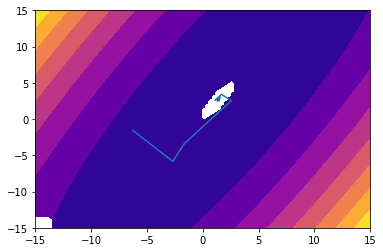

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

# 假設不同 state 的位置
plt.plot(X[:,0], X[:,1])

# 底下的圖
N = 100
x = np.linspace(min(np.min(X),LB), max(np.max(X),UB), N)
y = np.linspace(min(np.min(X),LB), max(np.max(X),UB), N)

X, Y = np.meshgrid(x, y)

# A low hump with a spike coming out.
# Needs to have z/colour axis on a log scale so we see both hump and spike.
# linear scale only shows the spike.
z = 6*(X**2)-6*X*Y+2*(Y**2)-X-2*Y

# Put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
z = ma.masked_where(z <= 0, z)


# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
# fig, ax = plt.subplots()
#cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
plt.contourf(X, Y, z, cmap='plasma')
# Alternatively, you can manually set the levels
# and the norm:
#lev_exp = np.arange(np.floor(np.log10(z.min())-1),
#                    np.ceil(np.log10(z.max())+1))
# levs = np.power(10, lev_exp)
# cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

# cbar = fig.colorbar(cs)

plt.show()